In [352]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import pylab
%matplotlib inline

## Load in data

In [329]:
dir_path = '/Users/danicosme/Documents/code/NHW17/HCPML/'
subs = np.load(os.path.join(dir_path,'subject_list.npy')).reshape(subs.shape[0],1)
dots = np.load(os.path.join(dir_path,'700subs_nfld_CV_SVMclf_dp.npy'))
dots_faces = np.load(os.path.join(dir_path,'700subs_nfld_CV_SVMdp_faceVsPlace.npy'))
beh = pd.read_csv(os.path.join(dir_path,'HCP_behavioraldata.csv'))
#print(dots.shape)
#print(dots[1:10])

#print(subs.shape)
#print(subs[1:10])

#print(beh.shape)
#print(beh[1:10])

#print(type(subs))
#print(type(dots))

## Convert variables to dataframes

In [335]:
subs_df = pd.DataFrame(subs)
dots_df = pd.DataFrame(dots)
dots_faces_df = pd.DataFrame(dots_faces)

merged_dots = pd.concat([subs_df, dots_df, dots_faces_df], axis=1)
merged_dots.columns = ['Subject', 'Dots', 'Dots Faces']
merged_dots.index = merged_dots['Subject']

print(merged_dots.shape)
merged_dots.head()

(300, 3)


,Subject,Dots,Dots Faces
Subject,,,
516742,516742,2.282412,0.403621
518746,518746,2.016628,0.226744
519647,519647,1.010285,0.359082
519950,519950,2.242528,-0.063541
520228,520228,1.596571,0.067696


In [337]:
merged_dots.Subject = merged_dots.Subject.astype(int)
pd.merge(beh, merged_dots, left_on=["Subject"], right_on=["Subject"])

merged_dots

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Odor_Unadj,Odor_AgeAdj,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,Dots,Dots Faces
0,516742,S1200,Q11,M,31-35,True,2,2,4,100.0,...,122.25,111.41,38.6,75.43,72.72,1.92,0.0,1.92,2.282412,0.403621
1,518746,S1200,Q12,M,22-25,True,1,1,4,100.0,...,101.12,86.45,38.6,98.31,99.06,1.88,1.0,1.84,2.016628,0.226744
2,519647,S1200,Q13,M,26-30,True,1,1,4,100.0,...,108.79,97.19,52.6,68.75,67.53,1.80,0.0,1.80,1.010285,0.359082
3,519950,S500,Q04,F,31-35,True,2,2,4,100.0,...,96.87,77.61,61.4,80.52,78.21,1.76,0.0,1.76,2.242528,-0.063541
4,520228,S900,Q10,M,22-25,True,2,2,4,100.0,...,108.79,97.19,50.1,79.67,78.91,1.88,1.0,1.84,1.596571,0.067696
5,521331,S500,Q04,F,26-30,False,1,1,2,50.0,...,122.25,111.41,38.6,107.75,104.45,1.80,0.0,1.80,2.667834,0.627587
6,522434,S500,Q05,F,26-30,True,1,1,4,100.0,...,122.25,110.45,52.6,70.31,69.72,1.80,1.0,1.76,3.316011,0.635211
7,523032,S900,Q09,M,31-35,True,1,1,4,100.0,...,108.79,98.04,50.1,73.86,71.78,1.80,2.0,1.72,2.504682,0.537630
8,524135,S900,Q10,M,22-25,True,1,2,4,100.0,...,101.12,86.45,38.6,86.03,86.60,1.84,0.0,1.84,2.647483,-0.023591
9,525541,S900,Q10,F,26-30,True,1,1,4,100.0,...,122.25,111.41,52.6,95.36,93.48,1.84,0.0,1.84,3.163394,0.241385


## Merge dataframes by subject ID

In [346]:
# check data types
print(beh['Subject'].dtype)
print(merged_dots['Subject'].dtype)

# set Subjects as index
beh.index = beh['Subject']
beh.head(10)

# merge dataframes
merged_dots.Subject = merged_dots.Subject.astype(int)
merged = pd.merge(beh, merged_dots, left_on=["Subject"], right_on=["Subject"])

# check output
print(merged.shape)
merged.head(10)

int64
int64
(300, 375)


,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Odor_Unadj,Odor_AgeAdj,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final,Dots,Dots Faces
0,516742,S1200,Q11,M,31-35,True,2,2,4,100.0,...,122.25,111.41,38.6,75.43,72.72,1.92,0.0,1.92,2.282412,0.403621
1,518746,S1200,Q12,M,22-25,True,1,1,4,100.0,...,101.12,86.45,38.6,98.31,99.06,1.88,1.0,1.84,2.016628,0.226744
2,519647,S1200,Q13,M,26-30,True,1,1,4,100.0,...,108.79,97.19,52.6,68.75,67.53,1.80,0.0,1.80,1.010285,0.359082
3,519950,S500,Q04,F,31-35,True,2,2,4,100.0,...,96.87,77.61,61.4,80.52,78.21,1.76,0.0,1.76,2.242528,-0.063541
4,520228,S900,Q10,M,22-25,True,2,2,4,100.0,...,108.79,97.19,50.1,79.67,78.91,1.88,1.0,1.84,1.596571,0.067696
5,521331,S500,Q04,F,26-30,False,1,1,2,50.0,...,122.25,111.41,38.6,107.75,104.45,1.80,0.0,1.80,2.667834,0.627587
6,522434,S500,Q05,F,26-30,True,1,1,4,100.0,...,122.25,110.45,52.6,70.31,69.72,1.80,1.0,1.76,3.316011,0.635211
7,523032,S900,Q09,M,31-35,True,1,1,4,100.0,...,108.79,98.04,50.1,73.86,71.78,1.80,2.0,1.72,2.504682,0.537630
8,524135,S900,Q10,M,22-25,True,1,2,4,100.0,...,101.12,86.45,38.6,86.03,86.60,1.84,0.0,1.84,2.647483,-0.023591
9,525541,S900,Q10,F,26-30,True,1,1,4,100.0,...,122.25,111.41,52.6,95.36,93.48,1.84,0.0,1.84,3.163394,0.241385


## Run correlations

In [341]:
# Check correlations between WM dot products and behavioral variables
print("Average WM Accuracy:")
print(sp.stats.pearsonr(merged['Dots'], merged['WM_Task_Acc']))
merged_na = merged.dropna(subset=['WM_Task_2bk_Acc'])
print("\n2-Back WM Accuracy:")
print(sp.stats.pearsonr(merged_na['Dots'], merged_na['WM_Task_2bk_Acc']))
print("\nAge adjusted working memory")
print(sp.stats.pearsonr(merged['Dots'], merged['ListSort_AgeAdj']))
print("\nFriendship")
print(sp.stats.pearsonr(merged['Dots'], merged['Friendship_Unadj']))


Average WM Accuracy:
(0.64080217062845723, 4.4034067291778942e-36)

2-Back WM Accuracy:
(0.49926607315418264, 4.5830539379253759e-20)

Age adjusted working memory
(0.28550063492278549, 4.9191784998214503e-07)

Friendship
(0.11206595726633184, 0.052495459441440705)


## Plot correlations for WM dot product

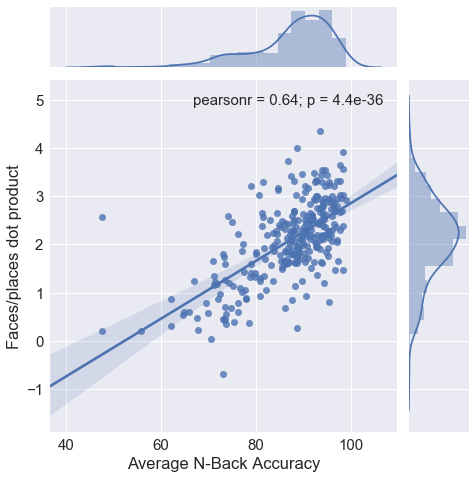

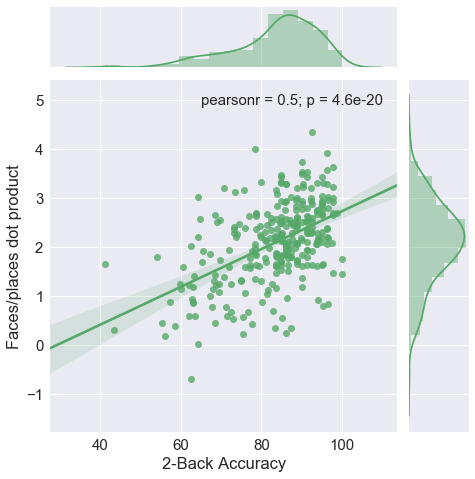

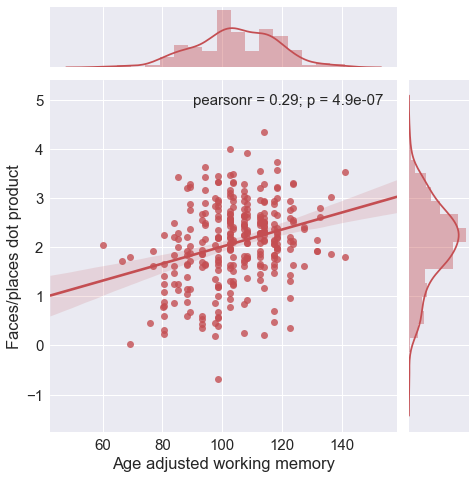

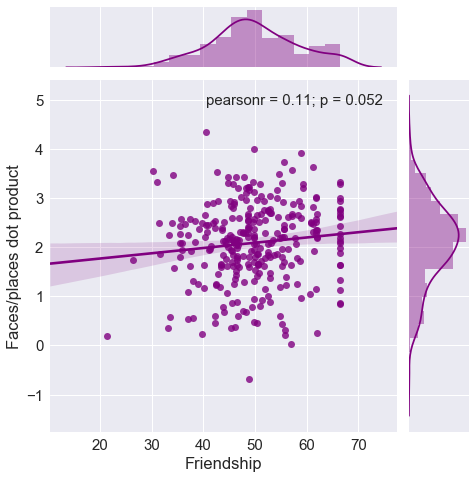

In [371]:
# plot dot products against accuracy
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)

plot.acc = sns.jointplot("WM_Task_Acc", "Dots", data=merged, 
                         kind="reg", color="b", size=7)
plt.xlabel("Average N-Back Accuracy")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/WM_accuracy.png', bbox_inches='tight')

plot.acc2 = sns.jointplot("WM_Task_2bk_Acc", "Dots", data=merged, 
                         kind="reg", color="g", size=7)
plt.xlabel("2-Back Accuracy")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/WM_accuracy2.png', bbox_inches='tight')


plot.mem = sns.jointplot("ListSort_AgeAdj", "Dots", data=merged, 
                         kind="reg", color="r", size=7)

plt.xlabel("Age adjusted working memory")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/WM_memory.png', bbox_inches='tight')

plot.friend = sns.jointplot("Friendship_Unadj", "Dots", data=merged, 
                         kind="reg", color="purple", size=7)

plt.xlabel("Friendship")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/WM_friend.png', bbox_inches='tight')

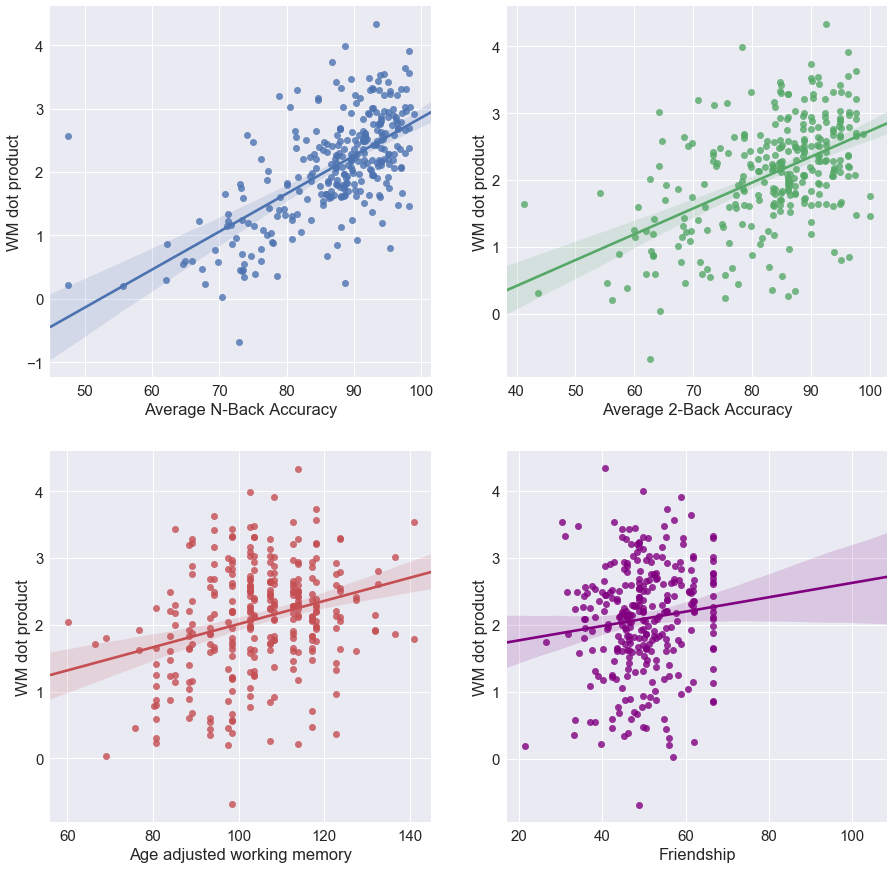

In [379]:
# plot face/places dot products against accuracy
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)

# set up matplot lib figure
f, axes = plt.subplots(2,2, figsize=(15,15))

tmp = sns.regplot("WM_Task_Acc", "Dots", data=merged, ax=axes[0,0])
tmp.set_xlabel("Average N-Back Accuracy")
tmp.set_ylabel("WM dot product")

tmp = sns.regplot("WM_Task_2bk_Acc", "Dots", data=merged, ax=axes[0,1])
tmp.set_xlabel("Average 2-Back Accuracy")
tmp.set_ylabel("WM dot product")

tmp =sns.regplot("ListSort_AgeAdj", "Dots", data=merged, ax=axes[1,0])
tmp.set_xlabel("Age adjusted working memory")
tmp.set_ylabel("WM dot product")

tmp = sns.regplot("Friendship_Unadj", "Dots", data=merged, ax=axes[1,1], color = 'purple')
tmp.set_xlabel("Friendship")
tmp.set_ylabel("WM dot product")

pylab.savefig('figs/face_place_quad.png', bbox_inches='tight')

## Plot correlations for Faces/Places dot product

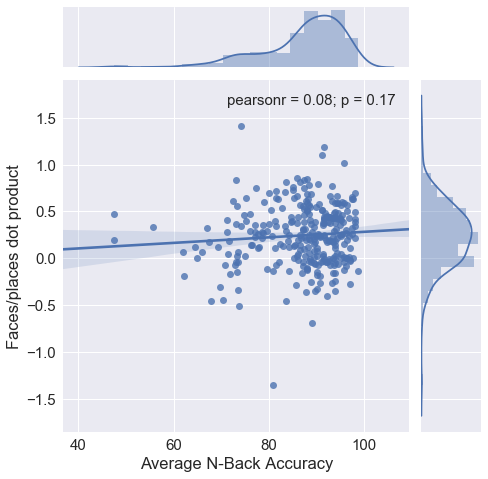

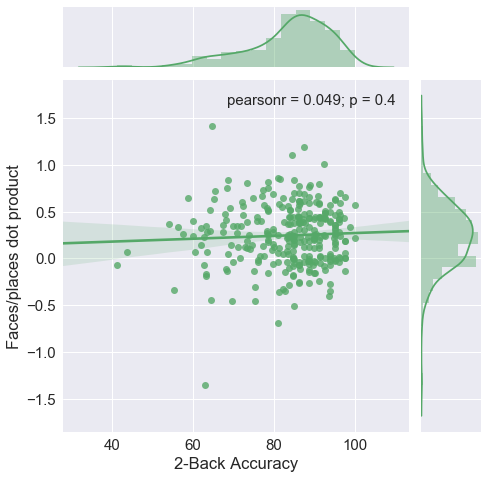

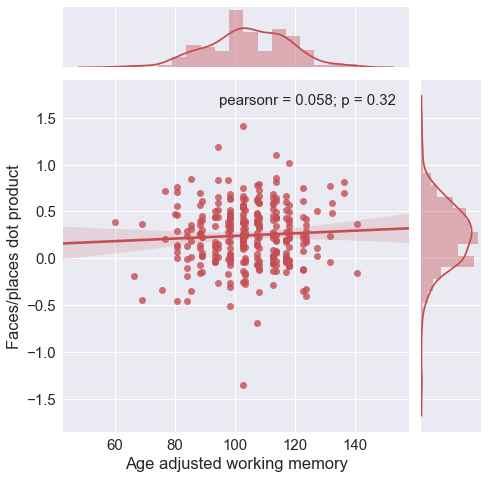

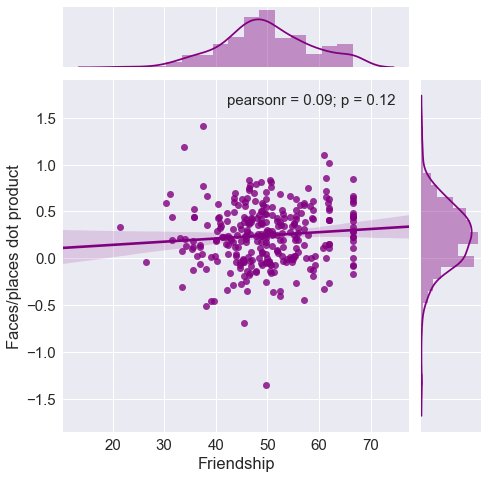

In [369]:
# plot dot products against accuracy
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)

plot.acc = sns.jointplot("WM_Task_Acc", "Dots Faces", data=merged, 
                         kind="reg", color="b", size=7)
plt.xlabel("Average N-Back Accuracy")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/face_place_accuracy.png', bbox_inches='tight')

plot.acc2 = sns.jointplot("WM_Task_2bk_Acc", "Dots Faces", data=merged, 
                         kind="reg", color="g", size=7)
plt.xlabel("2-Back Accuracy")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/face_place_accuracy2.png', bbox_inches='tight')


plot.mem = sns.jointplot("ListSort_AgeAdj", "Dots Faces", data=merged, 
                         kind="reg", color="r", size=7)

plt.xlabel("Age adjusted working memory")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/face_place_memory.png', bbox_inches='tight')

plot.friend = sns.jointplot("Friendship_Unadj", "Dots Faces", data=merged, 
                         kind="reg", color="purple", size=7)

plt.xlabel("Friendship")
plt.ylabel("Faces/places dot product")
pylab.savefig('figs/face_place_friend.png', bbox_inches='tight')

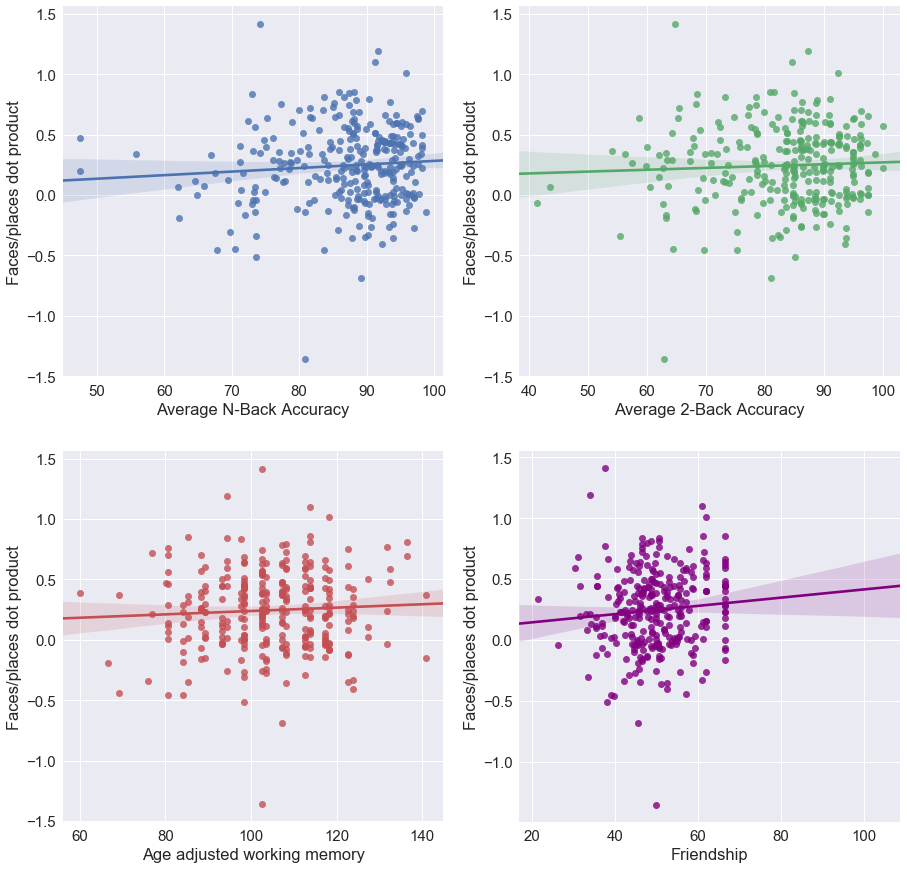

In [377]:
# plot face/places dot products against accuracy
sns.set(style="darkgrid", color_codes=True, font_scale=1.5)

# set up matplot lib figure
f, axes = plt.subplots(2,2, figsize=(15,15))

tmp = sns.regplot("WM_Task_Acc", "Dots Faces", data=merged, ax=axes[0,0])
tmp.set_xlabel("Average N-Back Accuracy")
tmp.set_ylabel("Faces/places dot product")

tmp = sns.regplot("WM_Task_2bk_Acc", "Dots Faces", data=merged, ax=axes[0,1])
tmp.set_xlabel("Average 2-Back Accuracy")
tmp.set_ylabel("Faces/places dot product")

tmp =sns.regplot("ListSort_AgeAdj", "Dots Faces", data=merged, ax=axes[1,0])
tmp.set_xlabel("Age adjusted working memory")
tmp.set_ylabel("Faces/places dot product")

tmp = sns.regplot("Friendship_Unadj", "Dots Faces", data=merged, ax=axes[1,1], color = 'purple')
tmp.set_xlabel("Friendship")
tmp.set_ylabel("Faces/places dot product")

pylab.savefig('figs/face_place_quad.png', bbox_inches='tight')